# Final Thesis Project - Training Data

This Notebook tests out different ML models and check the scores. 

The training dataset contains a total of ? samples. 

In [116]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.style.use('bmh')

In [117]:
import os
print(os.getcwd())

C:\Users\aluca\Github\PlethMachineLearning


In [118]:
# Loading Data
data_train = np.load('data_train_type2.npy', allow_pickle=True)
labels_train = np.load('labels_train_type2.npy', allow_pickle=True)

print(data_train.shape, labels_train.shape)

(696, 16) (696,)


In [119]:
'''
# Loading Data
napoli_test = np.load('napoli_data.npy', allow_pickle=True)
labels_test = np.load('napoli_labels.npy', allow_pickle=True)

#print(da_train.shape, labels_train.shape)
'''

"\n# Loading Data\nnapoli_test = np.load('napoli_data.npy', allow_pickle=True)\nlabels_test = np.load('napoli_labels.npy', allow_pickle=True)\n\n#print(da_train.shape, labels_train.shape)\n"

In [120]:
# Labels Encoding

labels_names = []

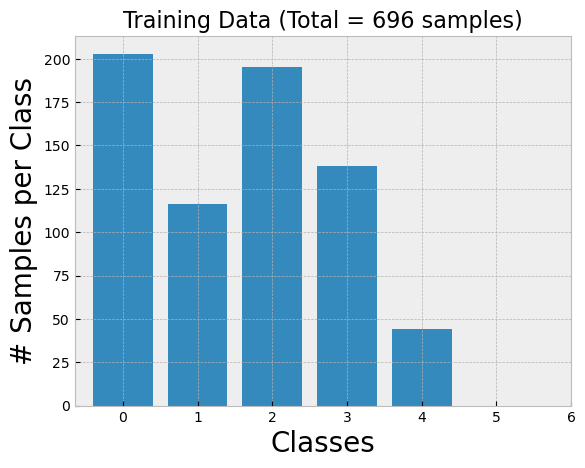

In [122]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[0])+' samples)',size=16);



In [123]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from skimage.transform import resize
from sklearn.svm import SVC
#from sklearn.metrics import roc_curve, roc_auc_score
#import cv2

In [124]:
X_train, X_test, t_train, t_test = train_test_split(data_train, labels_train, 
                                                   test_size=0.2,
                                                   stratify=labels_train,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(556, 16)
(556,)
(140, 16)
(140,)


In [125]:
'''
X_napoli_train, X_napoli_test, t_napoli_train, t_napoli_test = train_test_split(napoli_test, labels_test, 
                                                   test_size=0.5,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)
'''

'\nX_napoli_train, X_napoli_test, t_napoli_train, t_napoli_test = train_test_split(napoli_test, labels_test, \n                                                   test_size=0.5,\n                                                   random_state=0)\nprint(X_train.shape)\nprint(t_train.shape)\nprint(X_test.shape)\nprint(t_test.shape)\n'

---

## 1.) LDA + LOGISTIC REGRESSION (Model No.1)

In [130]:
mod1 = Pipeline([('SCALER', StandardScaler()),
                 ('LDA', LDA(n_components=15)),
                 ('LOGRES', LogisticRegression())])
mod1.fit(X_train, t_train)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [ ]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'LDA__n_components': [2, 3, 4, 5, 6],  # Test different number of components for LDA
    'LOGRES__penalty': ['l1', 'l2'],  # Test different regularization penalties
    'LOGRES__C': [0.1, 1.0, 10.0, 100.0, 1000.0],  # Test different values of regularization strength
    'LOGRES__solver': ['liblinear', 'saga']  # Test different solvers
}

grid_search = GridSearchCV(mod1, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use best model found
lda_best_model = grid_search.best_estimator_

C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\L

C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\L

C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aluca\AppData\Local\anaconda3\L

In [111]:
#pred_test1 = mod1.predict(X_napoli_test)

In [127]:
# Make predictions on test set
pred_test1 = lda_best_model.predict(X_test)

print('LDA + LR:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test1))
print ('F1_score:\n',f1_score(t_test, pred_test1, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test1))

ValueError: X has 16 features, but StandardScaler is expecting 15 features as input.

In [113]:
'''
print('LR\n')
print('Accuracy:\n',accuracy_score(t_napoli_test, pred_test1))
print ('F1_score:\n',f1_score(t_napoli_test, pred_test1, average=None))
print('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test1))
'''

"\nprint('LR\n')\nprint('Accuracy:\n',accuracy_score(t_napoli_test, pred_test1))\nprint ('F1_score:\n',f1_score(t_napoli_test, pred_test1, average=None))\nprint('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test1))\n"

## 2.) PCA + LOGISTIC REGRESSION (Model No. 2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64),)


IndexError: index 15 is out of bounds for axis 0 with size 15

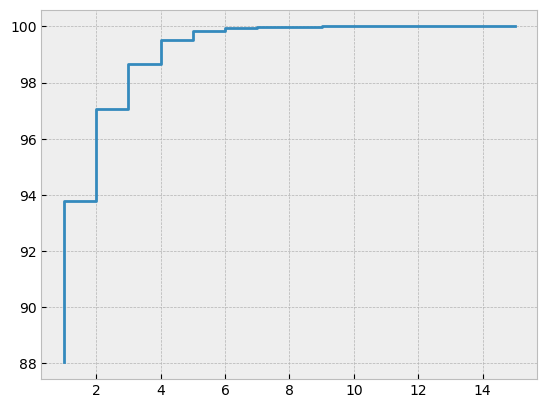

In [115]:
N, D = np.shape(X_train)
pca = PCA(n_components=min(N,D))
pca.fit(X_train)

plt.step(range(1,min(N,D)+1),np.cumsum(pca.explained_variance_ratio_)*100)

print(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9))
print(np.cumsum(pca.explained_variance_ratio_)[15])
plt.xlabel('Number of principal components');
plt.ylabel('% Variance explained');

In [16]:
mod2 = Pipeline([('SCALER', StandardScaler()),
                 ('PCA', PCA(n_components=15)),
                 ('LOGREG', LogisticRegression(random_state=0, tol=0.01))]) 
mod2.fit(X_train, t_train)

Pipeline(steps=[('SCALER', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('LOGREG', LogisticRegression(random_state=0, tol=0.01))])

In [17]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'PCA__n_components': [10, 12, 15, 17, 19],  # Test different number of components for PCA
    'LOGREG__penalty': ['l1', 'l2'],  # Test different regularization penalties
    'LOGREG__C': [0.1, 1.0, 10.0, 100.0, 1000.0],  # Test different values of regularization strength
}

# Create a pipeline with standard scaler, PCA, and Logistic Regression
mod2 = Pipeline([
    ('SCALER', StandardScaler()),
    ('PCA', PCA(n_components=16)),
    ('LOGREG', LogisticRegression(random_state=0, tol=0.01))
])

grid_search = GridSearchCV(mod2, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
pca_best_model = grid_search.best_estimator_

C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best Parameters: {'LOGREG__C': 10.0, 'LOGREG__penalty': 'l2', 'PCA__n_components': 15}


C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aluca\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [18]:
# Make predictions on test set
pred_test2 = pca_best_model.predict(X_test)

print('PCA + LR:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test2))
print ('F1_score:\n',f1_score(t_test, pred_test2, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test2))


PCA + LR:
Training Accuracy: 
  0.9285714285714286
F1_score:
 [0.91764706 0.93023256 0.98734177 0.89285714 0.82352941]
Confusion matrix:
[[39  0  1  1  0]
 [ 2 20  0  0  1]
 [ 0  0 39  0  0]
 [ 3  0  0 25  0]
 [ 0  0  0  2  7]]


In [19]:
'''
pred_test2 = mod2.predict(X_napoli_test)

print('Accuracy:\n',accuracy_score(t_napoli_test, pred_test2))
print ('F1_score:\n',f1_score(t_napoli_test, pred_test2, average=None))
print('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test2))
'''

"\npred_test2 = mod2.predict(X_napoli_test)\n\nprint('Accuracy:\n',accuracy_score(t_napoli_test, pred_test2))\nprint ('F1_score:\n',f1_score(t_napoli_test, pred_test2, average=None))\nprint('Confusion matrix:\n',confusion_matrix(t_napoli_test, pred_test2))\n"

## 3.) Random Forest (Model No. 3)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [22]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'n_estimators': [50, 150, 250],  # Number of trees in the forest
    #'max_depth': [None, 20, 40],  # Maximum depth of the trees
    #'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 4, 10],  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
rf_best_model = grid_search.best_estimator_

Best Parameters: {'n_estimators': 50}


In [23]:
# Make predictions on test set
pred_test3 = rf_best_model.predict(X_test)

print('RF:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test3))
print ('F1_score:\n',f1_score(t_test, pred_test3, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test3))

RF:
Training Accuracy: 
  0.9571428571428572
F1_score:
 [0.96296296 0.93617021 0.98734177 0.94736842 0.875     ]
Confusion matrix:
[[39  0  1  1  0]
 [ 0 22  0  1  0]
 [ 0  0 39  0  0]
 [ 1  0  0 27  0]
 [ 0  2  0  0  7]]


In [24]:
'''
pred_test3 = rf_classifier.predict(X_napoli_test)

print('With Random Forest:')
print('Test Accuracy Score = ',accuracy_score(t_napoli_test, pred_test3))
print('Confusion matrix:')
print(confusion_matrix(t_napoli_test, pred_test3))
'''

"\npred_test3 = rf_classifier.predict(X_napoli_test)\n\nprint('With Random Forest:')\nprint('Test Accuracy Score = ',accuracy_score(t_napoli_test, pred_test3))\nprint('Confusion matrix:')\nprint(confusion_matrix(t_napoli_test, pred_test3))\n"

## 4.) XGBoost (Model No.4)

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
import seaborn as sns

In [26]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=0)

In [55]:
######## GRIDSEARCH CROSS-VALIDATION ##########

# Parameter grid
param_grid = {
    'n_estimators': [50, 150, 250],  # Number of trees
    #'max_depth': [3, 5, 7],  # Maximum depth of a tree
    #'learning_rate': [0.01, 0.2, 0.4],  # Learning rate
    #'gamma': [0, 0.2, 0.4],  # Minimum loss reduction required to make a further partition
    #'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search, fit on data
grid_search.fit(X_train, t_train)

# Get the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found
xgb_best_model = grid_search.best_estimator_

Best Parameters: {'n_estimators': 250}


## Feature Importance for XGB model

       Feature  Importance
9      f (bpm)    0.568969
1    Te (msec)    0.070384
7           MV    0.070187
5           EV    0.064390
4           TV    0.063969
3          PEF    0.045738
8     P (msec)    0.038712
11  EEP (msec)    0.024178
12        Penh    0.015602
13        EF50    0.011446
0    Ti (msec)    0.007788
6    RT (msec)    0.006421
14          Sr    0.005300
2          PIF    0.003459
10  EIP (msec)    0.003458


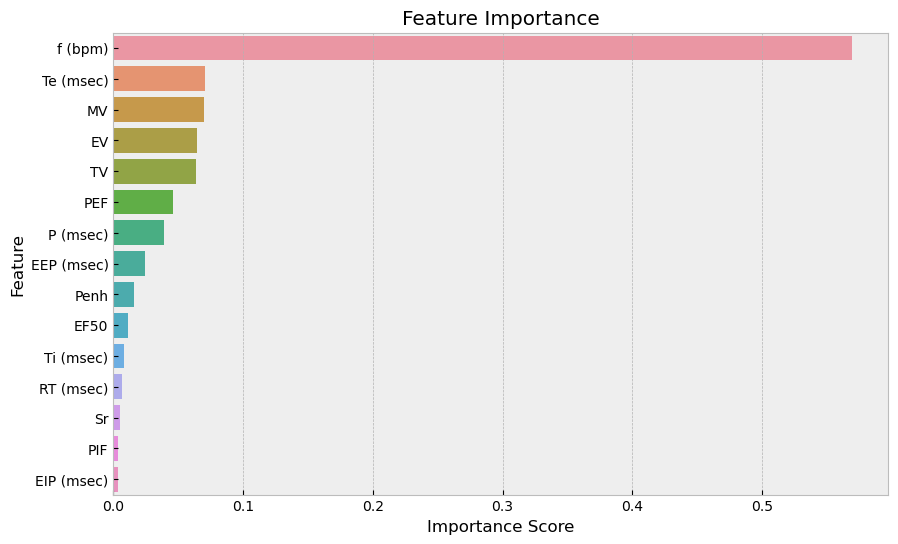

In [36]:
%matplotlib inline
# Get feature importance scores from the trained XGBoost model
feature_importance = xgb_best_model.feature_importances_

# Replace 'column_names' with the actual variable name containing the column names
#column_names = ['Ti (msec)', 'PIF', 'PEF', 'EV', 'RT (msec)', 'f (bpm)', 'EIP (msec)', 'EEP (msec)', 'Penh', 'EF50', 'RH', 'Tbox', 'VCF', 'AV', 'Sr']
#column_names = ['Ti (msec)', 'Te (msec)', 'PIF', 'PEF', 'TV', 'EV', 'RT (msec)', 'MV', 'P (msec)', 'f (bpm)', 'EIP (msec)', 'EEP (msec)', 'Penh', 'EF50', 'RH', 'Sr', 'Phase']
column_names = ['Ti (msec)', 'Te (msec)', 'PIF', 'PEF', 'TV', 'EV', 'RT (msec)', 'MV', 'P (msec)', 'f (bpm)', 'EIP (msec)', 'EEP (msec)', 'Penh', 'EF50', 'Sr', 'Phase']

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [99]:
%matplotlib qt
plot_tree(xgb_best_model, num_trees=25, rankdir='LR')  # Change num_trees to visualize a different tree if needed
plt.show()

booster = xgb_best_model.get_booster()
booster.dump_model('xgb_best_model.txt')

## K-fold cross-validation (Used to estimate the skill of the model on new data)

Cross-Validation Scores: [0.94642857 0.94594595 0.91891892 0.96396396 0.95495495]
Mean CV Score: 0.9460424710424711


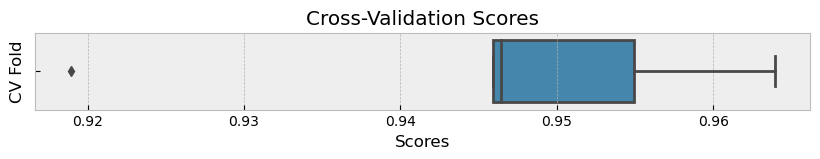

In [45]:
%matplotlib inline
# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_best_model, X_train, t_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Visualize cross-validation scores
plt.figure(figsize=(10, 1))
sns.boxplot(x=cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Scores')
plt.ylabel('CV Fold')
plt.show()

In [46]:
# Make predictions on test set
pred_test4 = xgb_best_model.predict(X_test)

print('XGB:')
print('Training Accuracy: \n ',accuracy_score(t_test, pred_test4))
print ('F1_score:\n',f1_score(t_test, pred_test4, average=None))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test4))

XGB:
Training Accuracy: 
  0.95
F1_score:
 [0.93975904 0.93617021 0.98734177 0.94545455 0.875     ]
Confusion matrix:
[[39  0  1  1  0]
 [ 1 22  0  0  0]
 [ 0  0 39  0  0]
 [ 2  0  0 26  0]
 [ 0  2  0  0  7]]


## 5.) CNN (Model No. 5)

In [34]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train_corrected.npy')

X_train_full.shape, t_train_full.shape

In [35]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

NameError: name 'X_train_full' is not defined

In [ ]:
del X_train_full, t_train_full
# free up space

In [ ]:

X_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0

X_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0

X_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0

X_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300,300,3]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, t_train, epochs=2, batch_size=32,
          validation_data=(X_val, t_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
model.evaluate(X_test, t_test)

# Exporting Best Performing ML Model

In [97]:
import joblib

# Save best model pkl file
joblib.dump(xgb_best_model, 'best_pleth_ml_model_type2.pkl')

['best_pleth_ml_model_type2.pkl']

# Testing on Unseen Data

In [98]:
# Loading Unseen Data
data_unseen_type2 = np.load('data_unseen_type2.npy', allow_pickle=True)
labels_unseen_type2 = np.load('labels_unseen_type2.npy', allow_pickle=True)

print(data_unseen_type2.shape, labels_unseen_type2.shape)

(160, 16) (160,)


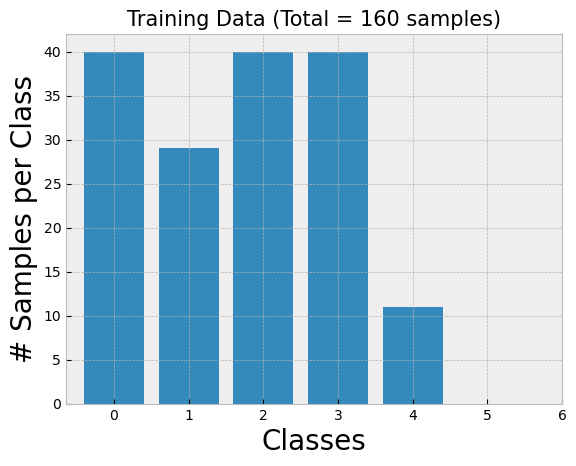

In [99]:
# Counting number samples per class
vals, counts = np.unique(labels_unseen_type2, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_unseen_type2.shape[0])+' samples)',size=15);

In [100]:
# Load the model from the file
loaded_model_type2 = joblib.load('best_pleth_ml_model_type2.pkl')

# Make predictions on unseen data
pred_unseen_type2 = loaded_model_type2.predict(data_unseen_type2)

print('XGB:')
print('Testing Accuracy: \n ',accuracy_score(labels_unseen_type2, pred_unseen_type2))
print ('F1_score:\n',f1_score(labels_unseen_type2, pred_unseen_type2, average=None))
print('Confusion matrix:')
print(confusion_matrix(labels_unseen_type2, pred_unseen_type2))

XGB:
Testing Accuracy: 
  0.98125
F1_score:
 [0.98734177 0.98305085 1.         0.975      0.90909091]
Confusion matrix:
[[39  0  0  1  0]
 [ 0 29  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 39  1]
 [ 0  1  0  0 10]]
